**Data Fields from [bike share demand |Kaggle](https://www.kaggle.com/c/bike-sharing-demand/data)**

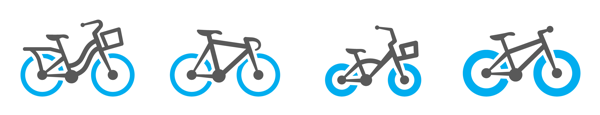

**Description**

* datetime - hourly date + timestamp
* season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals
 

## Evaluation

Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE).  
분류와 회귀중 회귀와 관련 된 문제 => 자전거 대여량을 예측하는 문제이기 때문에

# 실습환경 조성하기

## 필수 라이브러리 로드 및 환경조성

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats 

# 노트북 안에 그래프를 그리기 위해 
%matplotlib inline 
# 그래프에서 격자로 숫자 범위가 눈에 잘 뛰도록 ggplot 스타일 사용 
plt.style.use("ggplot")

# 그래프에서 마이너스 폰트가 깨지는 문제에 대한 대처 
mpl.rcParams['axes.unicode_minus'] = False 

In [2]:
# #구글 드라이브 연동하기
# #구글 드라이브에 데이터를 올린 후 사용할 경우에만 실행
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
#Colab 사용자용 Matplotlib 한글깨짐 문제해결
#Colab 사용자 분들께서는 반드시 실행시켜 주셔야 합니다.

# # 나눔고딕 설치
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

# # 나눔고딕 경로확인하기
# sys_font=fm.findSystemFonts()
# nanum_font = [f for f in sys_font if 'NanumGothic.ttf' in f]
# nanum_font

# # 위에 나온 경로를 가져오기(똑같으면 바로 실행하시고 다르면 위에 내용을 복붙해주세요!)
# path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# font_name = fm.FontProperties(fname=path, size=10).get_name()
# print(font_name)
# plt.rc('font', family=font_name)

# fm._rebuild()


In [4]:
from IPython.display import set_matplotlib_formats
import os

if os.name == "posix":
    plt.rc('font', family = "AppleGothic")
elif os.name == "nt":
    plt.rc('font', family="Malgun Gothic")

# 마이너스 폰트 깨짐 방지 
plt.rc('axes', unicode_minus=False)

# 폰트 선명도 개선
set_matplotlib_formats('retina')

## 데이터 로드하기 

In [5]:
train = pd.read_csv("data_sets/bike_sharing_demand/train.csv",parse_dates=["datetime"])
# parse_dates 
train.shape

(10886, 12)

In [6]:
test = pd.read_csv("data_sets/bike_sharing_demand/test.csv",parse_dates = ["datetime"] )

* [parse_dates에 대한 설명](https://rfriend.tistory.com/536)

데이터 프레임을 만들때 날짜/시간(Date/Time)이 포함되어 있을때 이를 날짜와 시간 형태에 맞도록 파싱해 읽어오는 방법  


# 데이터 탐색하기 

In [7]:
print(train.columns)
print(train.dtypes)
train.info()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 

In [8]:
train.isnull().sum()
# 오랜만에 결측치가 없나? 

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
train.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [10]:
train.tail(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10866,2012-12-19 04:00:00,4,0,1,1,9.84,12.120,75,8.9981,1,6,7
10867,2012-12-19 05:00:00,4,0,1,1,10.66,14.395,75,6.0032,2,29,31
10868,2012-12-19 06:00:00,4,0,1,1,9.84,12.880,75,6.0032,3,109,112
10869,2012-12-19 07:00:00,4,0,1,1,10.66,13.635,75,8.9981,3,360,363
10870,2012-12-19 08:00:00,4,0,1,1,9.84,12.880,87,7.0015,13,665,678
10871,2012-12-19 09:00:00,4,0,1,1,11.48,14.395,75,7.0015,8,309,317
10872,2012-12-19 10:00:00,4,0,1,1,13.12,16.665,70,7.0015,17,147,164
10873,2012-12-19 11:00:00,4,0,1,1,16.40,20.455,54,15.0013,31,169,200
10874,2012-12-19 12:00:00,4,0,1,1,16.40,20.455,54,19.0012,33,203,236
10875,2012-12-19 13:00:00,4,0,1,1,17.22,21.210,50,12.9980,30,183,213


In [11]:
train.sample(20)
# 진짜 없나보넹! 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5079,2011-12-05 17:00:00,4,0,1,1,17.22,21.210,77,0.0000,16,430,446
12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84
5471,2012-01-03 02:00:00,1,0,1,1,7.38,8.335,51,16.9979,0,3,3
7918,2012-06-10 07:00:00,2,0,0,1,24.60,28.790,78,7.0015,21,41,62
5691,2012-01-12 07:00:00,1,0,1,2,13.94,15.910,87,19.0012,2,218,220
5004,2011-12-02 14:00:00,4,0,1,1,17.22,21.210,44,7.0015,25,145,170
6998,2012-04-09 22:00:00,2,0,1,2,18.86,22.725,41,32.9975,6,102,108
9697,2012-10-08 10:00:00,4,1,0,2,15.58,19.695,68,8.9981,69,229,298
5143,2011-12-08 09:00:00,4,0,1,1,9.84,10.605,52,26.0027,7,218,225
493,2011-02-03 16:00:00,1,0,1,1,9.02,10.605,37,16.9979,5,73,78


In [12]:
# 기온에 대한 자료만 따로 정확히 분석해 봅니다
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

<AxesSubplot:>

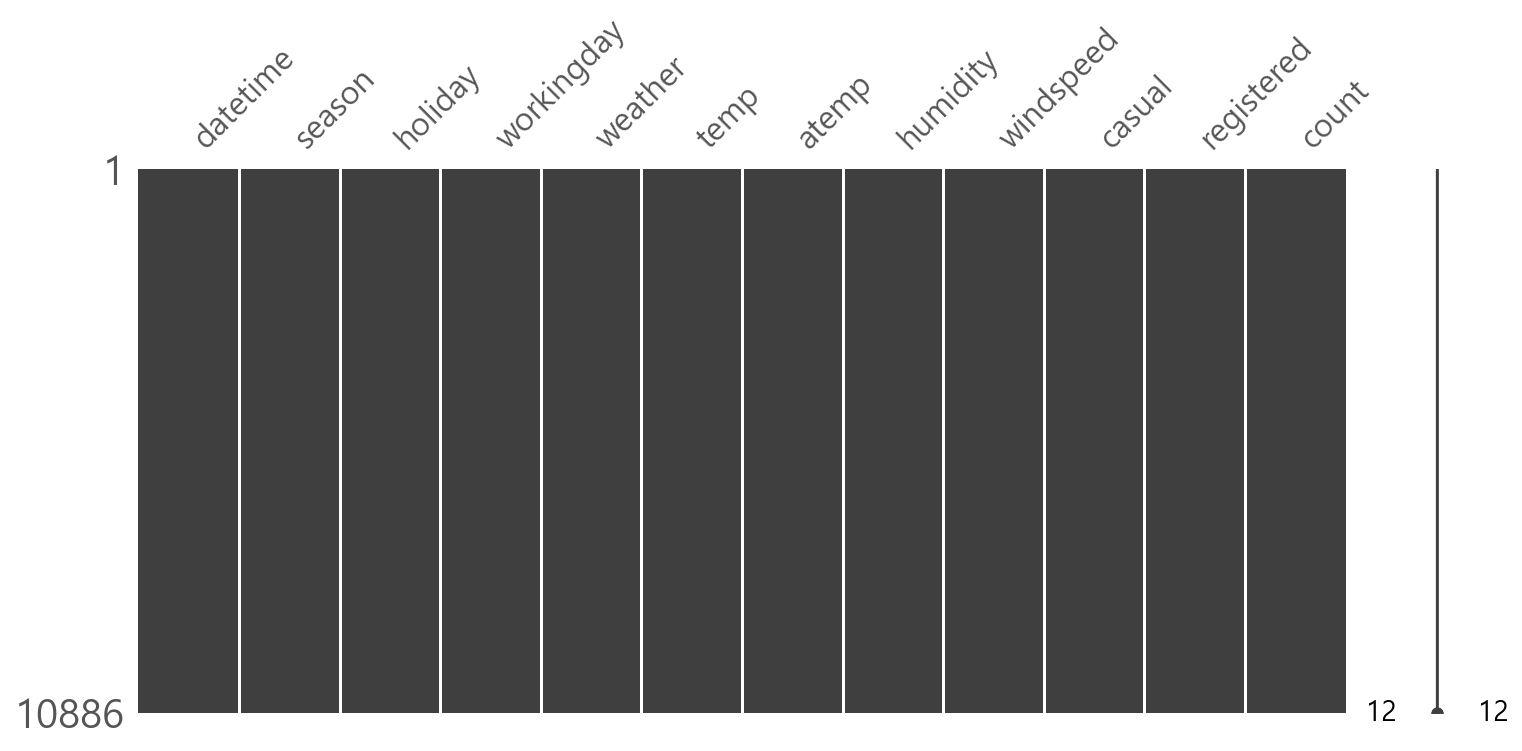

In [13]:
# 결측치가 있는지 시각화해보기 위한 라이브러리인 missingno를 로드하여 시각적으로 확인합니다. 
import missingno as msno

msno.matrix(train, figsize=(12,5))

# 결측치가 없음을 볼 수 있다. 

In [14]:
# 실행 이전 모습 
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16


In [15]:
# 이후 자료의 조회 및 응용의 편의성을 위해 
# datetime 열에 있는 정보를 좀 더 세분화 합니다. 

train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
print(train.shape)
train.head(1)

(10886, 18)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0


[Text(0.5, 0, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

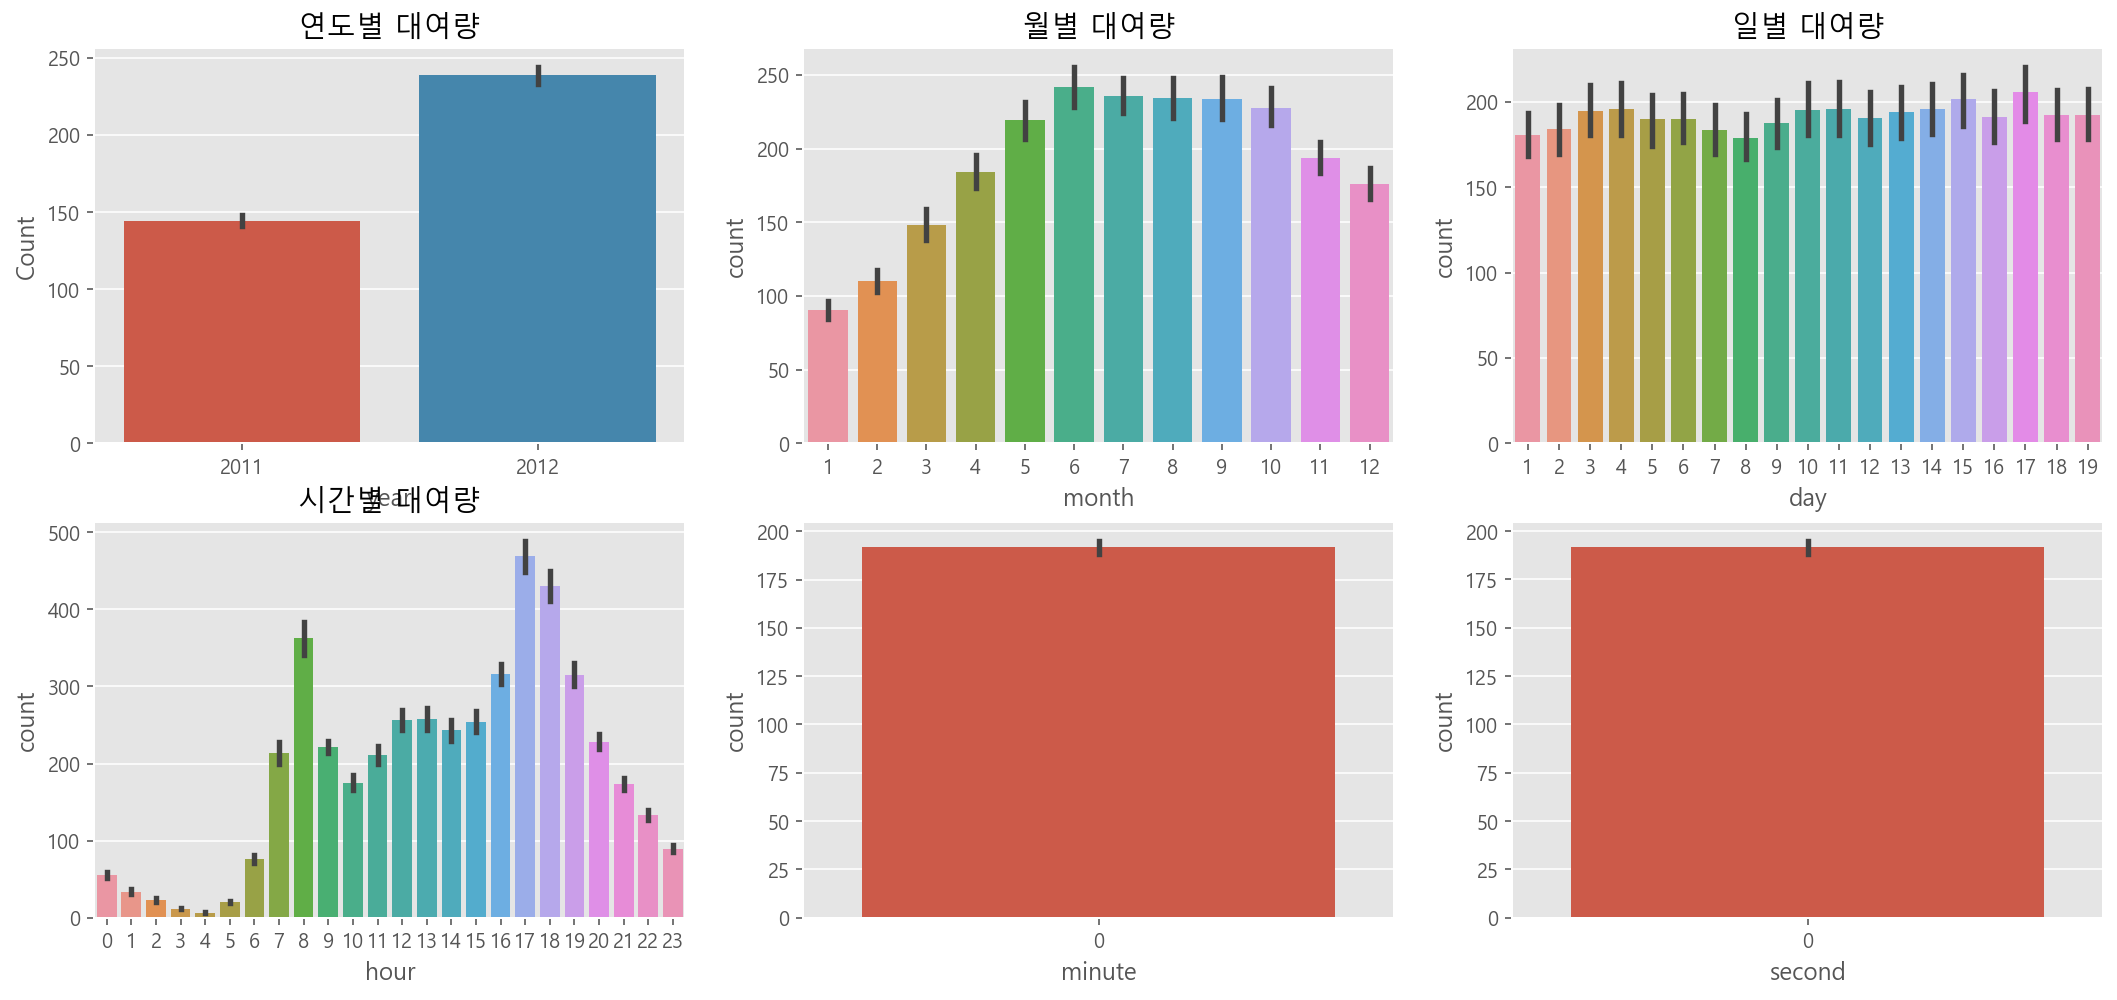

In [16]:
# seaborn의 barplot을 이용하여 데이터를 시각화합니다. 
# 이때 figure 객체에 총 6가지 그래프를 동시에 표현해줍니다. 
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols=3) # 2행 3열 짜리 객체 지정, 총 6개의 축
figure.set_size_inches(18,8) # 전체 figure 객체의 크기를 할당합니다 .

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)
sns.barplot(data=train, x="minute", y="count", ax=ax5)
sns.barplot(data=train, x="second", y="count", ax=ax6)

ax1.set(ylabel='Count',title="연도별 대여량")
ax2.set(xlabel='month',title="월별 대여량")
ax3.set(xlabel='day', title="일별 대여량")
ax4.set(xlabel='hour', title="시간별 대여량")

* 연도별 대여량은 2011년 보다 2012년이 더 많다.
* 월별 대여량은 6월에 가장 많고 7~10월도 대여량이 많다. 그리고 1월에 가장 적다.
* 일별대여량은 1일부터 19일까지만 있고 나머지 날짜는 test.csv에 있다. 그래서 이 데이터는 피처로 사용하면 안 된다.
* 시간 대 대여량을 보면 출퇴근 시간에 대여량이 많은 것 같다. 하지만 주말과 나누어 볼 필요가 있을 것 같다.
* 분, 초도 다 0이기 때문에 의미가 없다.

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, '근무일 여부에 따른 대여량')]

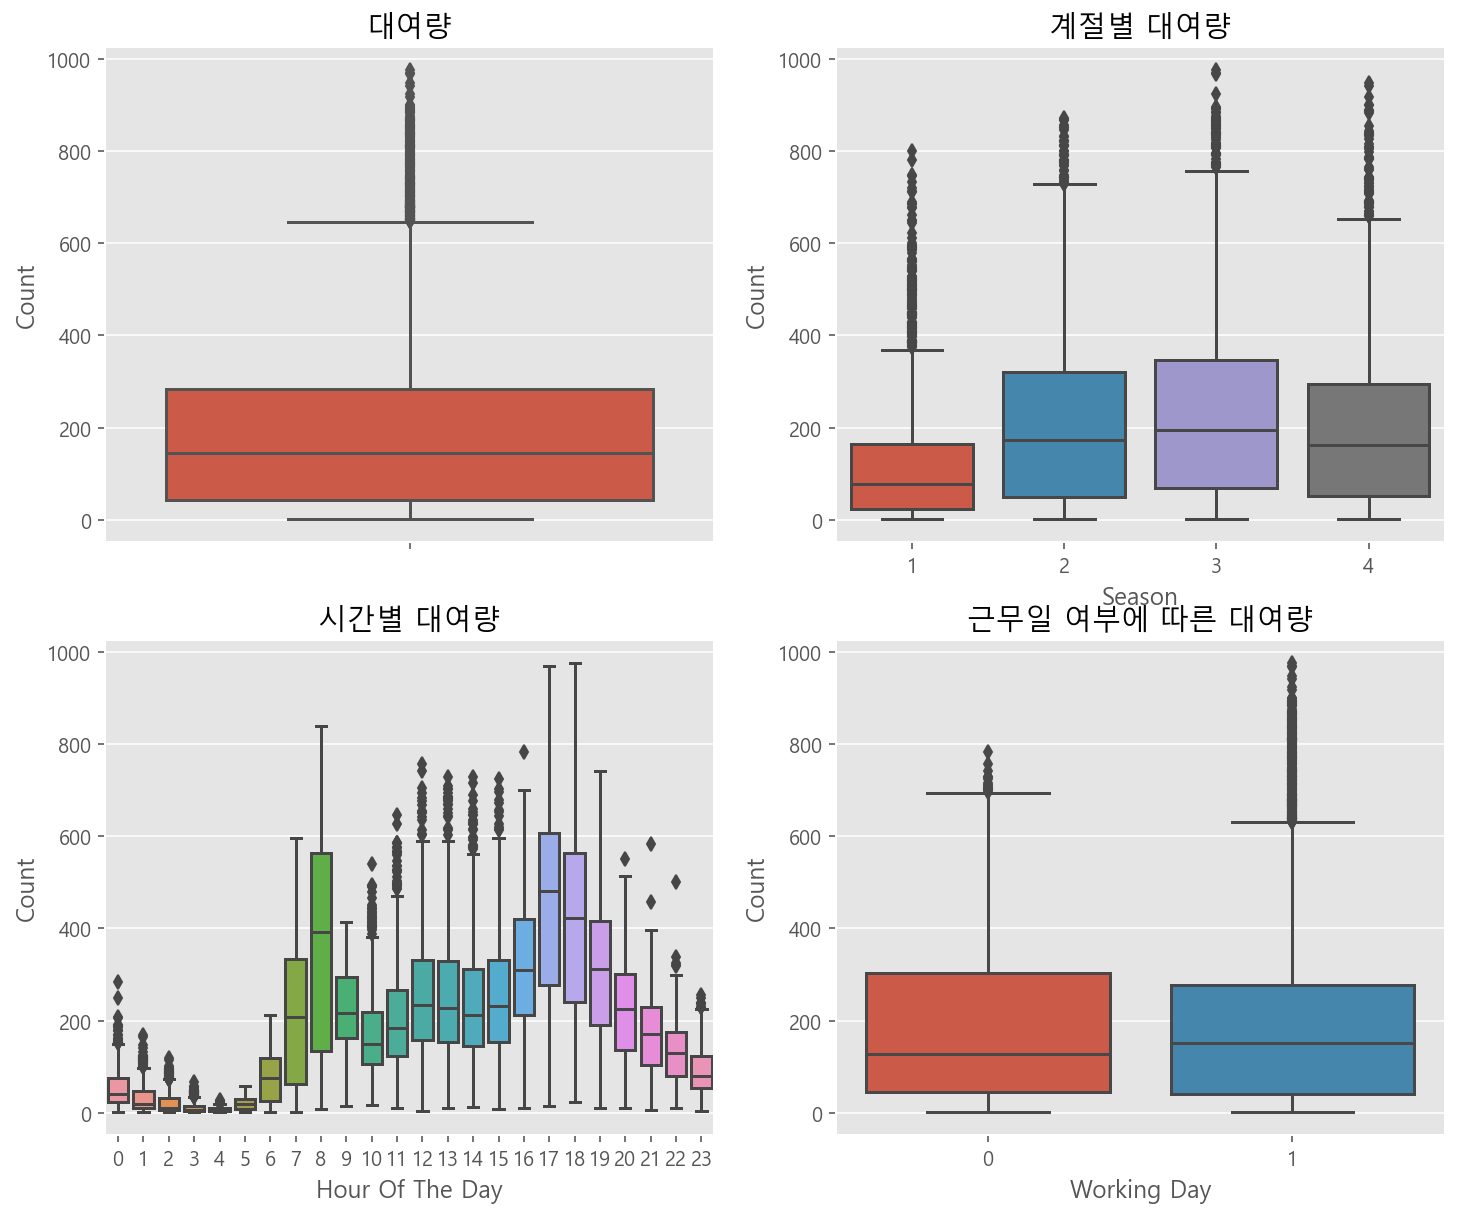

In [17]:
# 데이터 전반을 봤을때 -> 각종 요인들 + count(대여량)의 자료로 이루어져 있다. 
# 분포를 보다 통계적으로 확인하기위해 + 데이터가 수치형임을 감안해 -> 박스플럿으로 그려봄 

# figure 객체 사용 -> 4개의 그림을 동시에!
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)

# 각 축의 인덱스를 활용한 수치부여방식
sns.boxplot(data=train,y="count",orient="v",ax=axes[0][0]) # count는 이 자료의 종속변수 임으로 독자적인 박스플롯을 그릴 필요가 있다.
                                                            # orient옵션은 이 자료를 수직으로 표현한다는 뜻 
sns.boxplot(data=train,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=train,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=train,y="count",x="workingday",orient="v",ax=axes[1][1])

# 각 그림의 레이블 설정 
axes[0][0].set(ylabel='Count',title="대여량")
axes[0][1].set(xlabel='Season', ylabel='Count',title="계절별 대여량")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="시간별 대여량")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="근무일 여부에 따른 대여량")

In [18]:
train.head()
# day of week 컬럼을 새로 지정해줍니다. 

train["datetime"]
train["datetime"].dt.dayofweek # 각 요일을 계산해줍니다. 
train["dayofweek"] = train["datetime"].dt.dayofweek
print(train.shape)
train.head()

# 0 == 월 
# 1 == 화 
# ...
# 6 == 일

(10886, 19)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [19]:
# 요일의 빈도를 계산합니다. 
train["dayofweek"].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='count'>

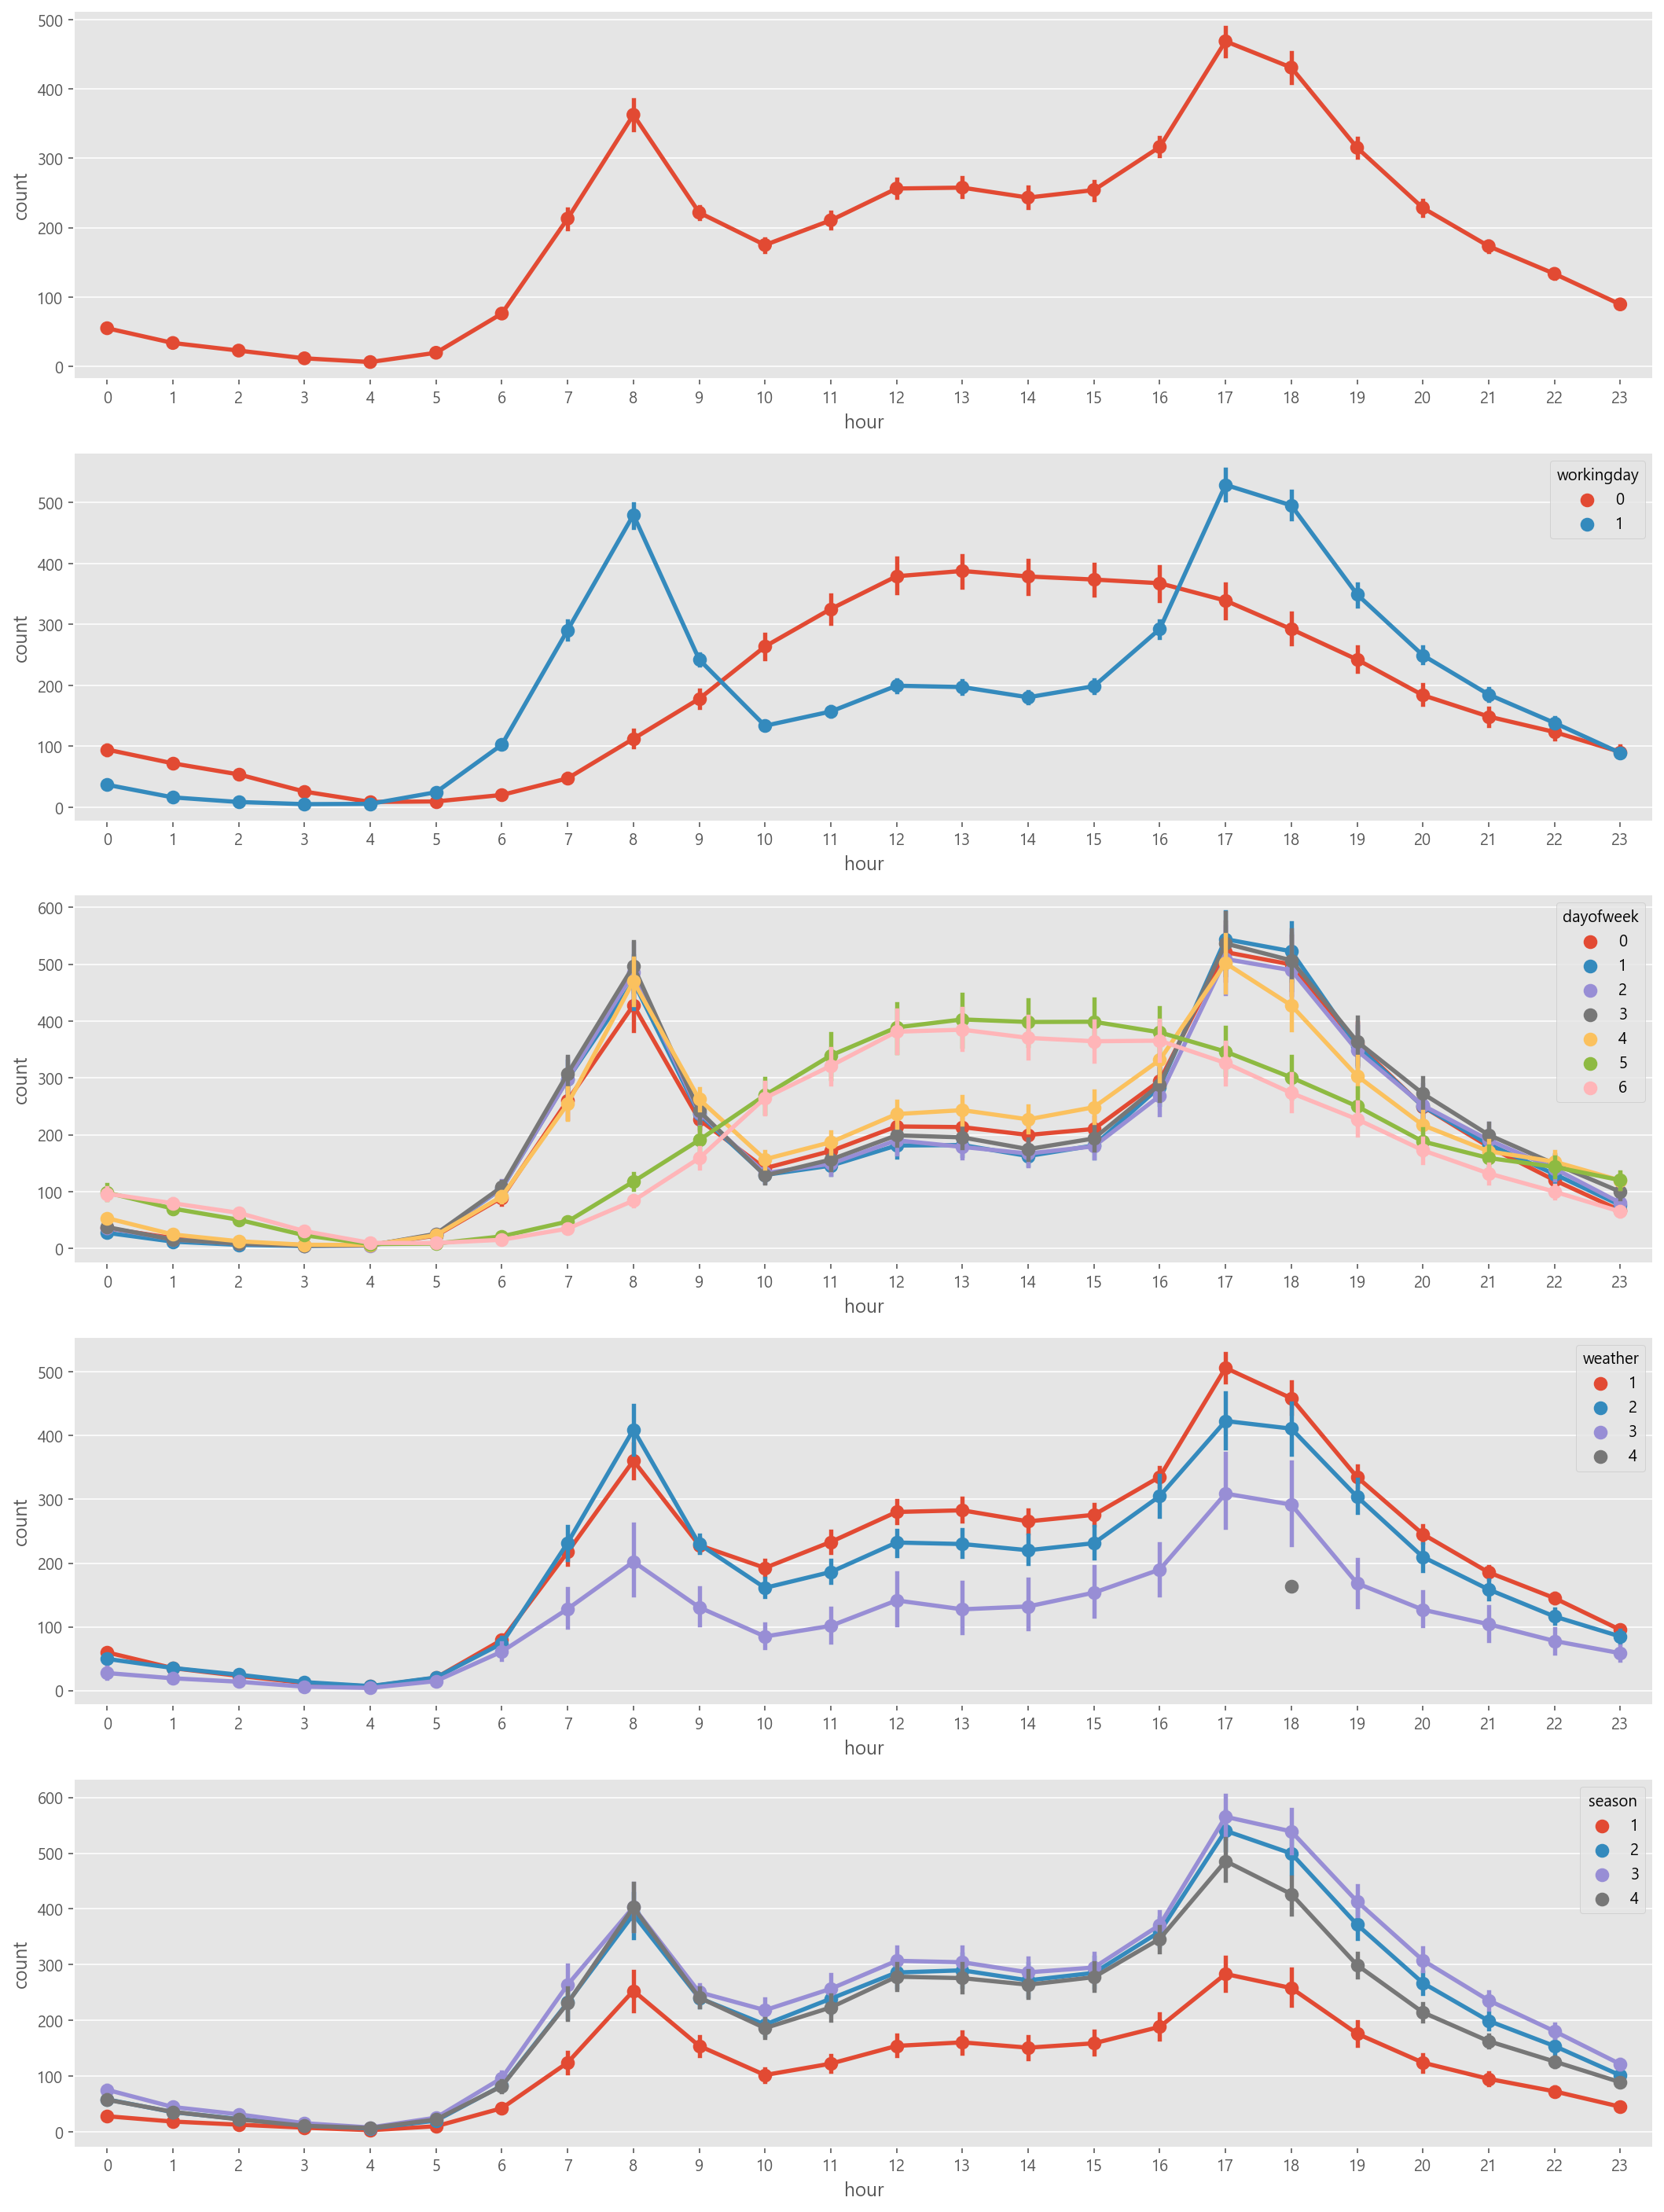

In [20]:
# 각 요인을 hue값으로 하여 요인별로 각 시간대별 대여건수를 시각화 합니다.
fig,(ax1,ax2,ax3,ax4,ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x="hour", y="count", ax=ax1)

sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax2)

sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=ax3)

sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=ax4)

sns.pointplot(data=train, x="hour", y="count", hue="season", ax=ax5)

In [21]:
corrMatt = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMatt = corrMatt.corr()
print(corrMatt)

# 히트맵에서 사용할 mask 생성 
# mask는 특정 부분을 지우기 위해 사용된다. 
# 상관계수의 경우 주 대각선을 기준으로 대칭이기 때문에 한면을 가려주는것이 좋다.
mask = np.array(corrMatt) # 우선 전체 배열을 모두 가져온다. -> 이후 일부분만 남겨 -> 이를 마스크로 사용해 지정된 부분을 가려준다. 
mask[np.tril_indices_from(mask)] = False # triu : triangular upper 
                                          # tril : triangular lower 
                                        # 즉 이부분의 코드는 mask 전체 행렬중 lower triangle을 지운다는 소리 -> 마스크로 사용시 밑부분만 나오게 되는것  

mask

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


array([[ 0.        ,  0.98494811,  0.46709706,  0.31857128, -0.06494877,
        -0.01785201,  0.39445364],
       [ 0.        ,  0.        ,  0.46206654,  0.31463539, -0.04353571,
        -0.057473  ,  0.38978444],
       [ 0.        ,  0.        ,  0.        ,  0.49724969, -0.3481869 ,
         0.09227619,  0.69041357],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.26545787,
         0.09105166,  0.97094811],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.31860699, -0.31737148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.10136947],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

<AxesSubplot:>

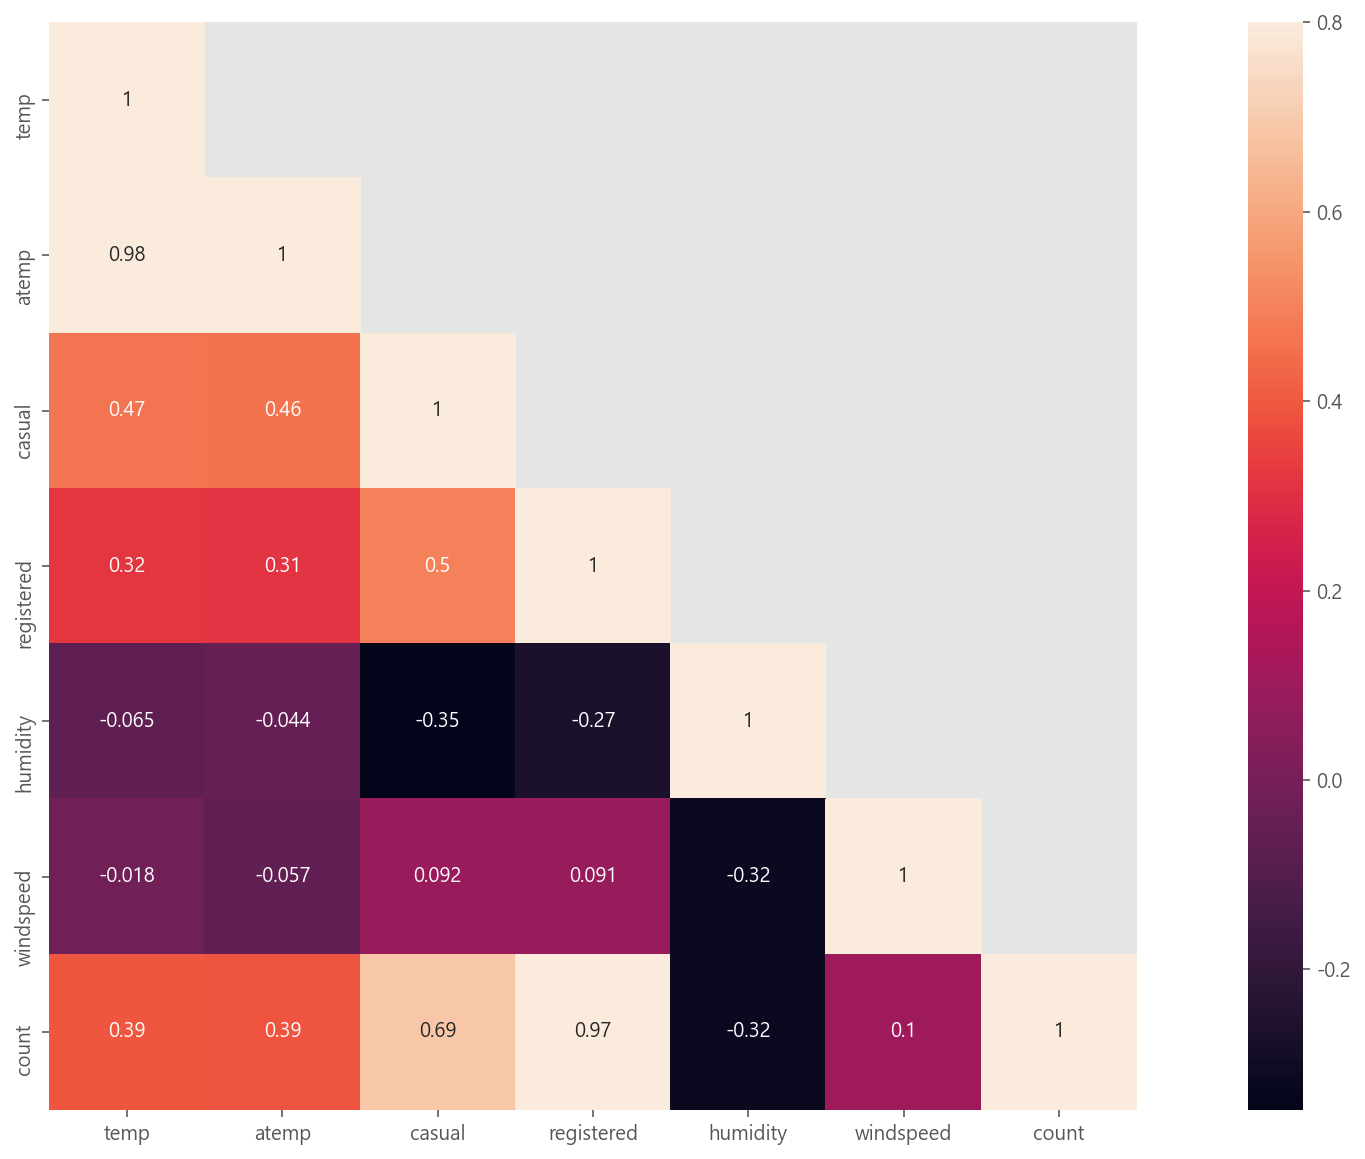

In [22]:
# 히트맵으로 표현하기 
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
# 위에서 생성한 마스크 사용한거 ㅇㅈ? 
# 나머지 옵션도 영어대로임 

* 온도, 습도, 풍속은 거의 연관관계가 없다.
* 대여량과 가장 연관이 높은 건 registered 로 등록 된 대여자가 많지만, test 데이터에는 이 값이 없다.
* atemp(체감온도)와 temp(온도)는 0.98로 상관관계가 높지만 온도와 체감온도로 피처로 사용하기에 적합하지 않을 수 있다.


<AxesSubplot:xlabel='humidity', ylabel='count'>

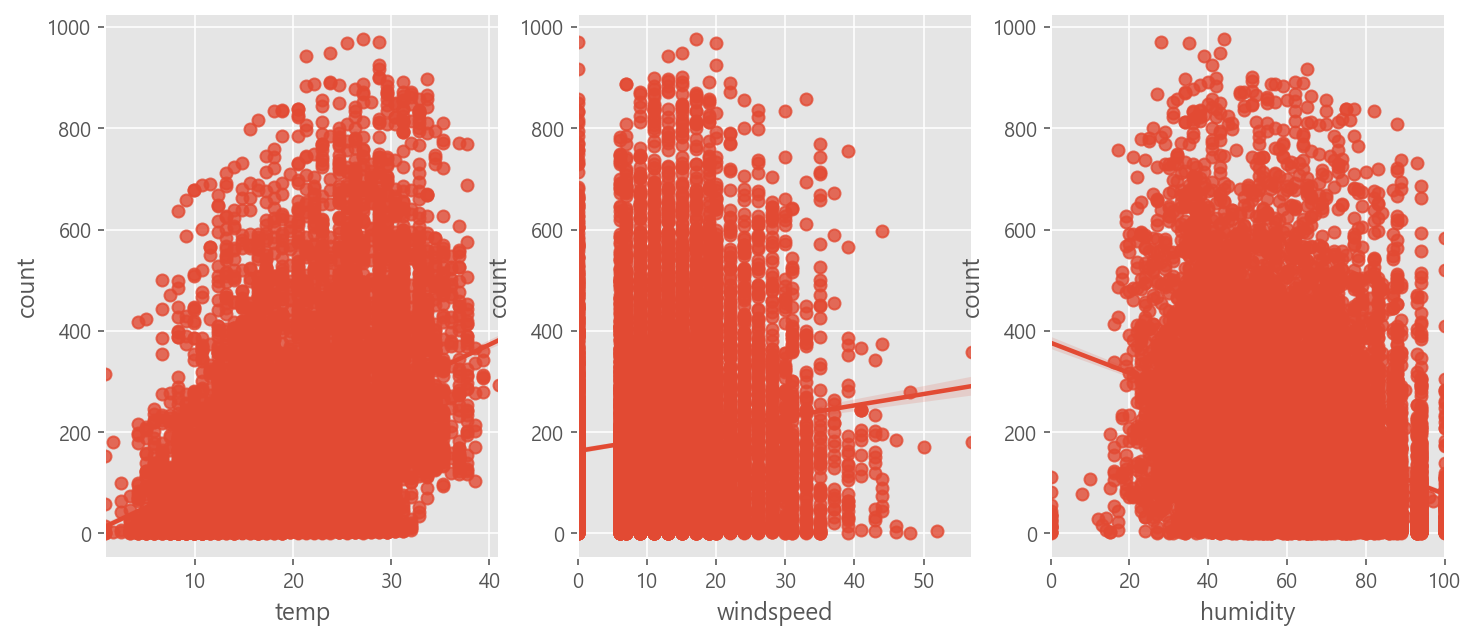

In [23]:
# seaborn의 regplot으로 시각화를 해봅니다. 
# regplot은 산점도와 함께 회귀선을 추정해준다는 장점을 지닙니다. 

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)

sns.regplot(x="temp", y="count", data=train,ax=ax1)
sns.regplot(x="windspeed", y="count", data=train,ax=ax2)
sns.regplot(x="humidity", y="count", data=train,ax=ax3)

풍속의 경우 0에 숫자가 몰려 있는 것으로 보인다. 아마도 관측되지 않은 수치에 대해 0으로 기록된 것이 아닐까 추측해 본다.

In [24]:
# 새로운 열을 생성합니다. 
# 각 월별 대여량을 알아보기 위해 년월을 합친 날짜타입의 열을 지정합니다. 
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

# apply함수를 통해 datetime열에 있는 데이터들을 -> 년_월로 전환해줍니다
train["year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "year_month"]].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


<AxesSubplot:xlabel='year_month', ylabel='count'>

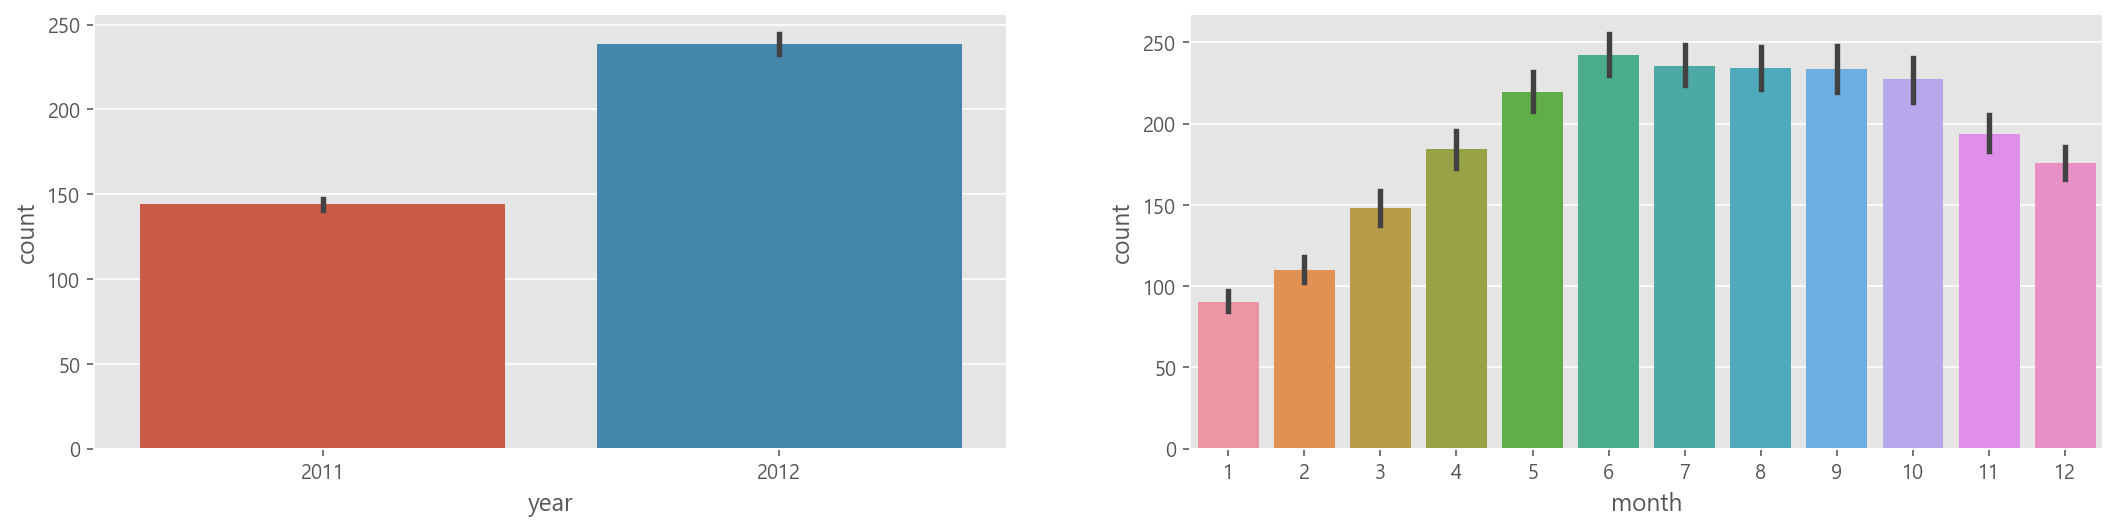

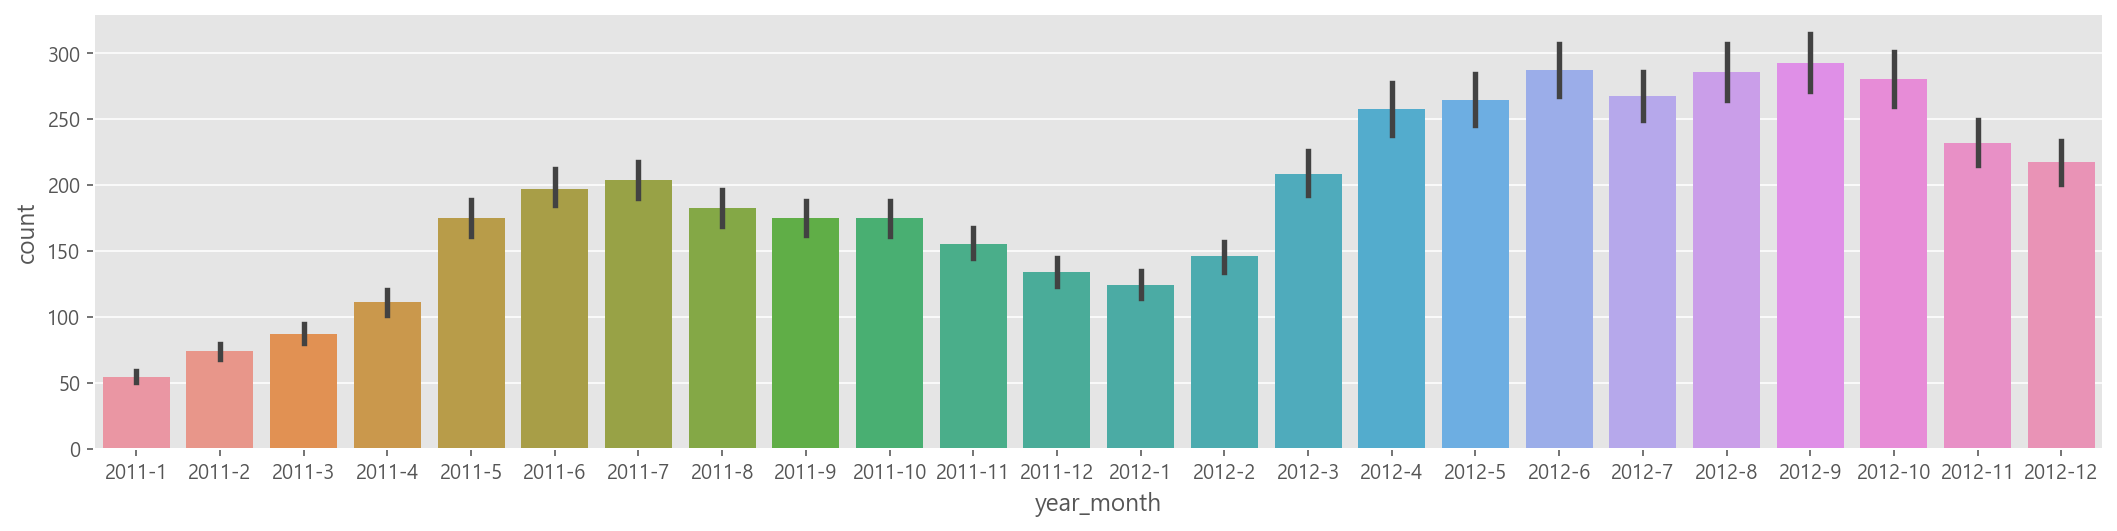

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x="year_month", y="count", ax=ax3)

* 2011년보다 2012년의 대여량이 더 많다.
* 겨울보다는 여름에 대여량이 많다.
* 2011년과 2012년의 월별 데이터를 이어보면 전체적으로 증가하는 추세이다.


In [1]:
# trainWithoutOutliers - 이상치를 제외한 데이터 생성
trainWithoutOutliers = train[np.abs(train["count"] - train["count"].mean()) <= (3*train["count"].std())]
# 이상치를 제거합니다. 
# 통계시간에 배웠듯, 평균으로부터 3표준편차 떨어진 데이터를 이상치로 규정합니다 .
# 해당 자료를 제거한것이 위의 코드 입니다. 

print(train.shape)
print(trainWithoutOutliers.shape)

NameError: name 'train' is not defined

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909612))

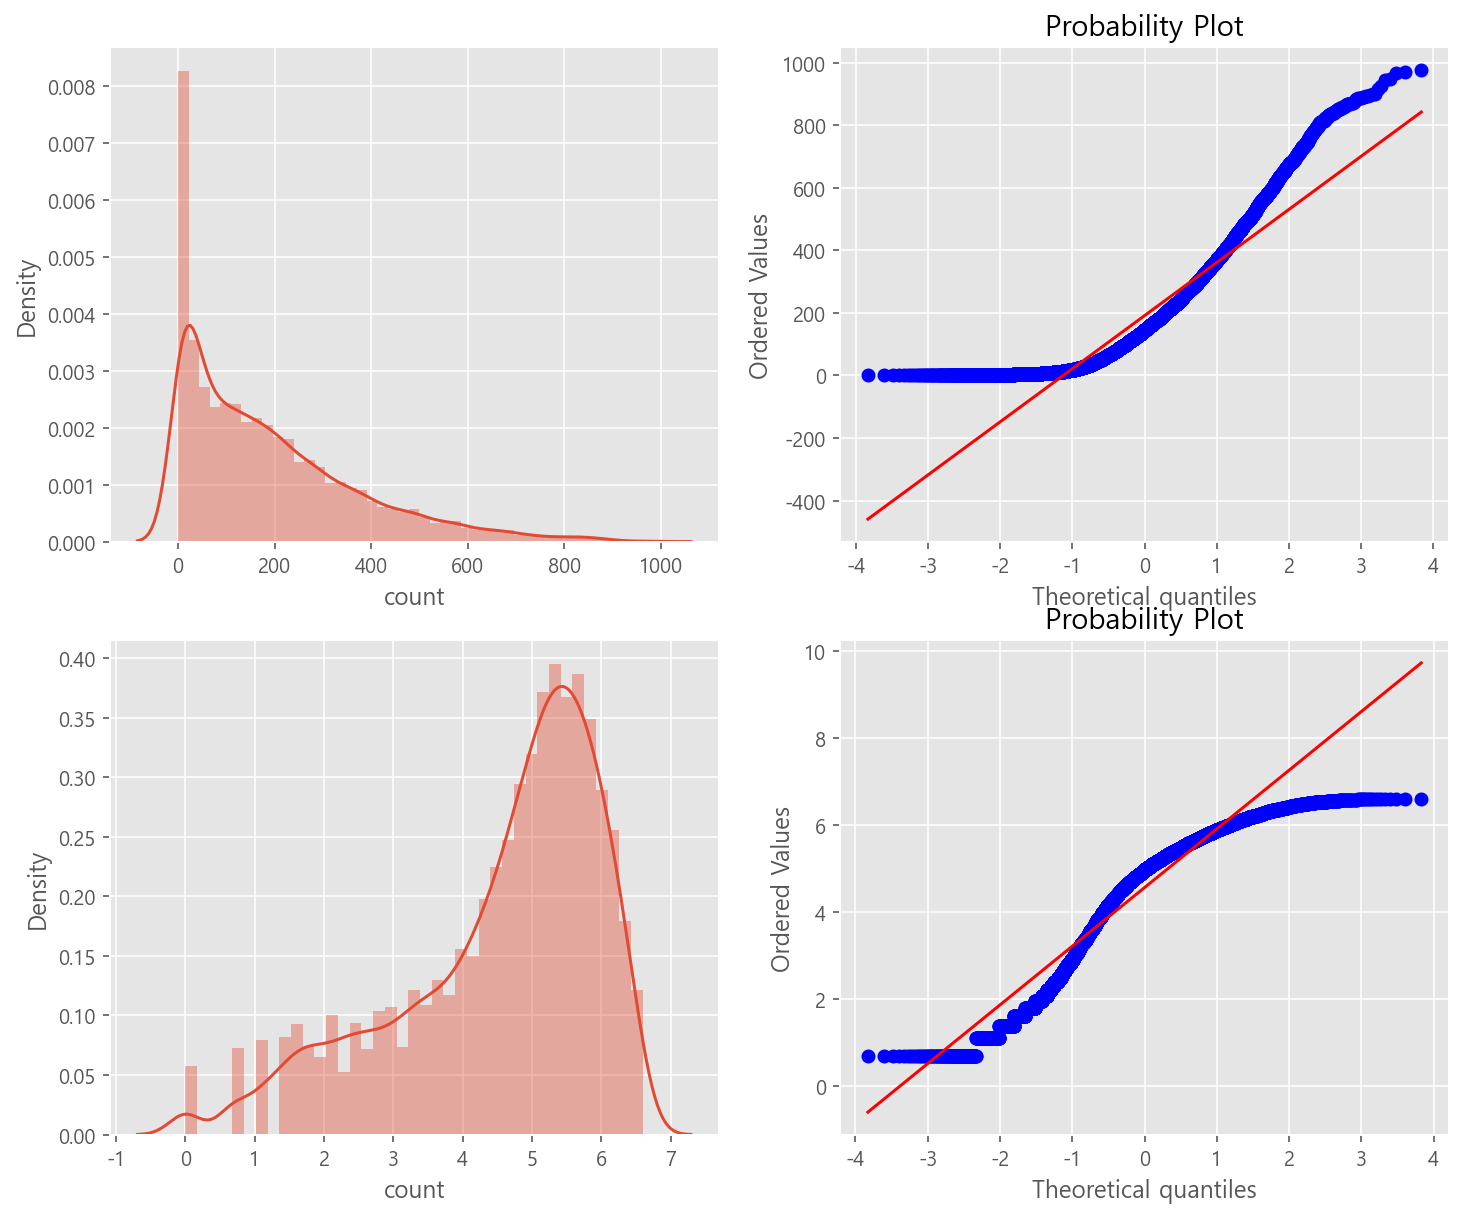

In [27]:
# count값의 데이터 분포도를 파악
figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10)

sns.distplot(train["count"], ax=axes[0][0]) #distribution : 분포 
stats.probplot(train["count"], dist='norm', fit=True, plot=axes[0][1]) #probability : 확률 밀도 함수 

sns.distplot(np.log(trainWithoutOutliers["count"]), ax=axes[1][0])#distribution : 분포 
stats.probplot(np.log1p(trainWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1]) #probability : 확률 밀도 함수 

count변수가 오른쪽에 치우쳐져 있다. 대부분의 기계학습은 종속변수가 normal 이어야 하기에 정규분포를 갖는 것이 바람직하다. 대안으로 outlier data를 제거하고 "count"변수에 로그를 씌워 변경해 봐도 정규분포를 따르지는 않지만 이전 그래프보다는 좀 더 자세히 표현하고 있다.



# Random Forest로 수요 예측하기 

## 데이터 설계 

In [28]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,2011-1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5,2011-1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5,2011-1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5,2011-1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5,2011-1


In [29]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

(6493, 16)

<AxesSubplot:title={'center':'test windspeed'}, xlabel='windspeed', ylabel='count'>

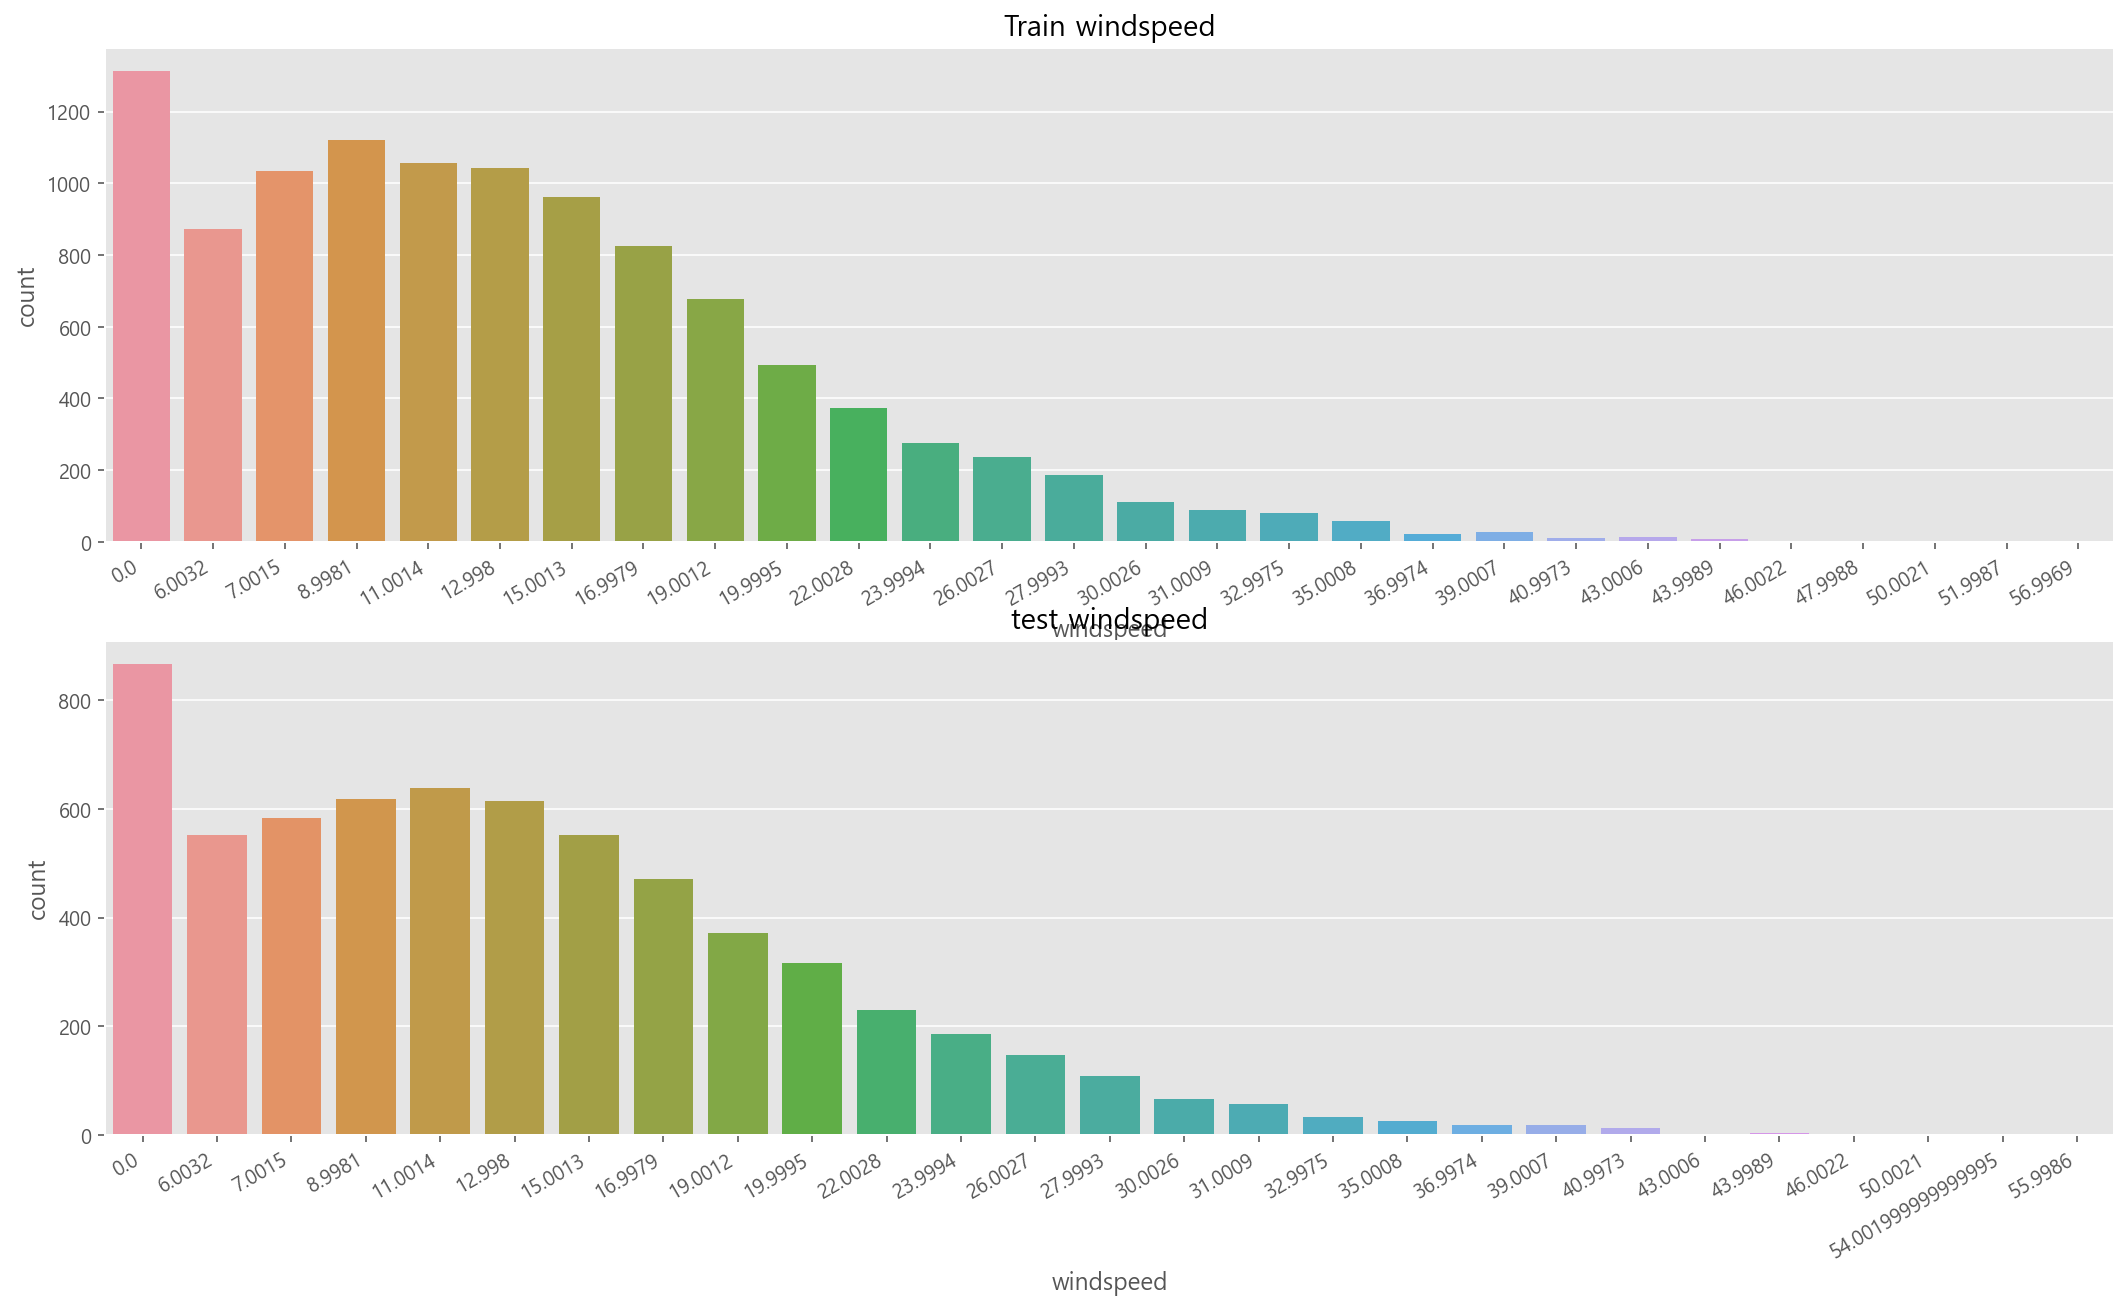

In [30]:
# train data와 test data 내부에 있는 풍속 데이터를 시각화 해봅니다. 
fig, axes = plt.subplots(nrows =2)
fig.set_size_inches(18,10)

# 객체 생성 1
plt.sca(axes[0]) # 이후 이어지는 일련의 객체를 figure의 첫 객체로 하겠다고 선언 
plt.xticks(rotation = 30, ha ="right")
axes[0].set(ylabel=' Count', title ="Train windspeed") # 그래프의 축 제목과 그래프 제목 선언 
sns.countplot(data = train, x="windspeed", ax=axes[0]) # 그래프 종류 설정 

# 객체 생성2 
plt.sca(axes[1])
plt.xticks(rotation=30, ha ="right")
axes[1].set(ylabel='Count',title="test windspeed")
sns.countplot(data=test, x="windspeed", ax=axes[1])

**결과를 살펴보면, data가 0에 뭉쳐있는 이상현상이 있음을 볼 수 있다**
이는 아마도, 측정이 되지 않은 값들을 0으로 대체한 것일 가능성이 높다  

In [31]:
# 풍속의 0값에 특정 값을 넣어준다.
# 평균을 구해 일괄적으로 넣어줄 수도 있지만, 예측의 정확도를 높이는 데 도움이 될것 같진 않다.
# train.loc[train["windspeed"] == 0, "windspeed"] = train["windspeed"].mean()
# test.loc[train["windspeed"] == 0, "windspeed"] = train["windspeed"].mean()

**풍속이 0인 데이터와 0이 아닌데이터를 나누어, 머신러닝 기법을 활용해 대용값을 계산한다**

1. 데이터 나누기

In [32]:
# 풍속이 0인것과 아닌 것의 세트를 나누어 준다.

trainWind0 = train.loc[train['windspeed'] == 0]
trainWindNot0 = train.loc[train['windspeed'] != 0]
print(trainWind0.shape)
print(trainWindNot0.shape)

(1313, 20)
(9573, 20)


2. 머신러닝, 랜덤포레스트 분류기로 데이터 예측하여 대입하기 

In [35]:
# 필수 라이브러리인 사이킷런에서 randomforest 모델을 불러옵니다. 
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data): 
    
    # 풍속이 0인것과 아닌 것을 나누어 준다. 
    data_wind_0 = data.loc[data["windspeed"]==0]
    data_wind_not_0 = data.loc[data["windspeed"] != 0]
    # 풍속을 예측할 피처를 선책한다. 
    wCol = ["season","weather","humidity","month","temp","year","atemp"]
    # 풍속이 0이 아닌 데이터들의 타입을 스트링 타입으로 바꿔준다. 
    data_wind_not_0["windspeed"] = data_wind_not_0["windspeed"].astype("str")
    
    # 랜덤포레스트 분류기를 사용한다. 
    rf_Model_wind = RandomForestClassifier() # 모델의 뼈대 세우기
    # wCol에 있는 특성값들을 바탕으로 풍속을 학습시킨다. 
    rf_Model_wind.fit(data_wind_not_0[wCol], data_wind_not_0["windspeed"])
    
    # 학습된 모형을 이용하여 예측을 실시한다. 
    wind_pred = rf_Model_wind.predict(X = data_wind_0[wCol])
    
    # 값을 다 예측 후 비교해 보기 위해
    # 예측한 값을 넣어 줄 데이터 프레임을 새로 만든다.
    predictWind0 = data_wind_0
    predictWindNot0 = data_wind_not_0

    # 값이 0으로 기록 된 풍속에 대해 예측한 값을 넣어준다.
    predictWind0["windspeed"] = wind_pred

    # dataWindNot0 0이 아닌 풍속이 있는 데이터프레임에 예측한 값이 있는 데이터프레임을 합쳐준다.
    data = predictWindNot0.append(predictWind0)

    # 풍속의 데이터타입을 float으로 지정해 준다.
    data["windspeed"] = data["windspeed"].astype("float")

    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)
    
    return data


<ipython-input-35-ed6269cbc310>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wind_not_0["windspeed"] = data_wind_not_0["windspeed"].astype("str")
<ipython-input-35-ed6269cbc310>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictWind0["windspeed"] = wind_pred


<AxesSubplot:title={'center':'train windspeed'}, xlabel='windspeed', ylabel='count'>

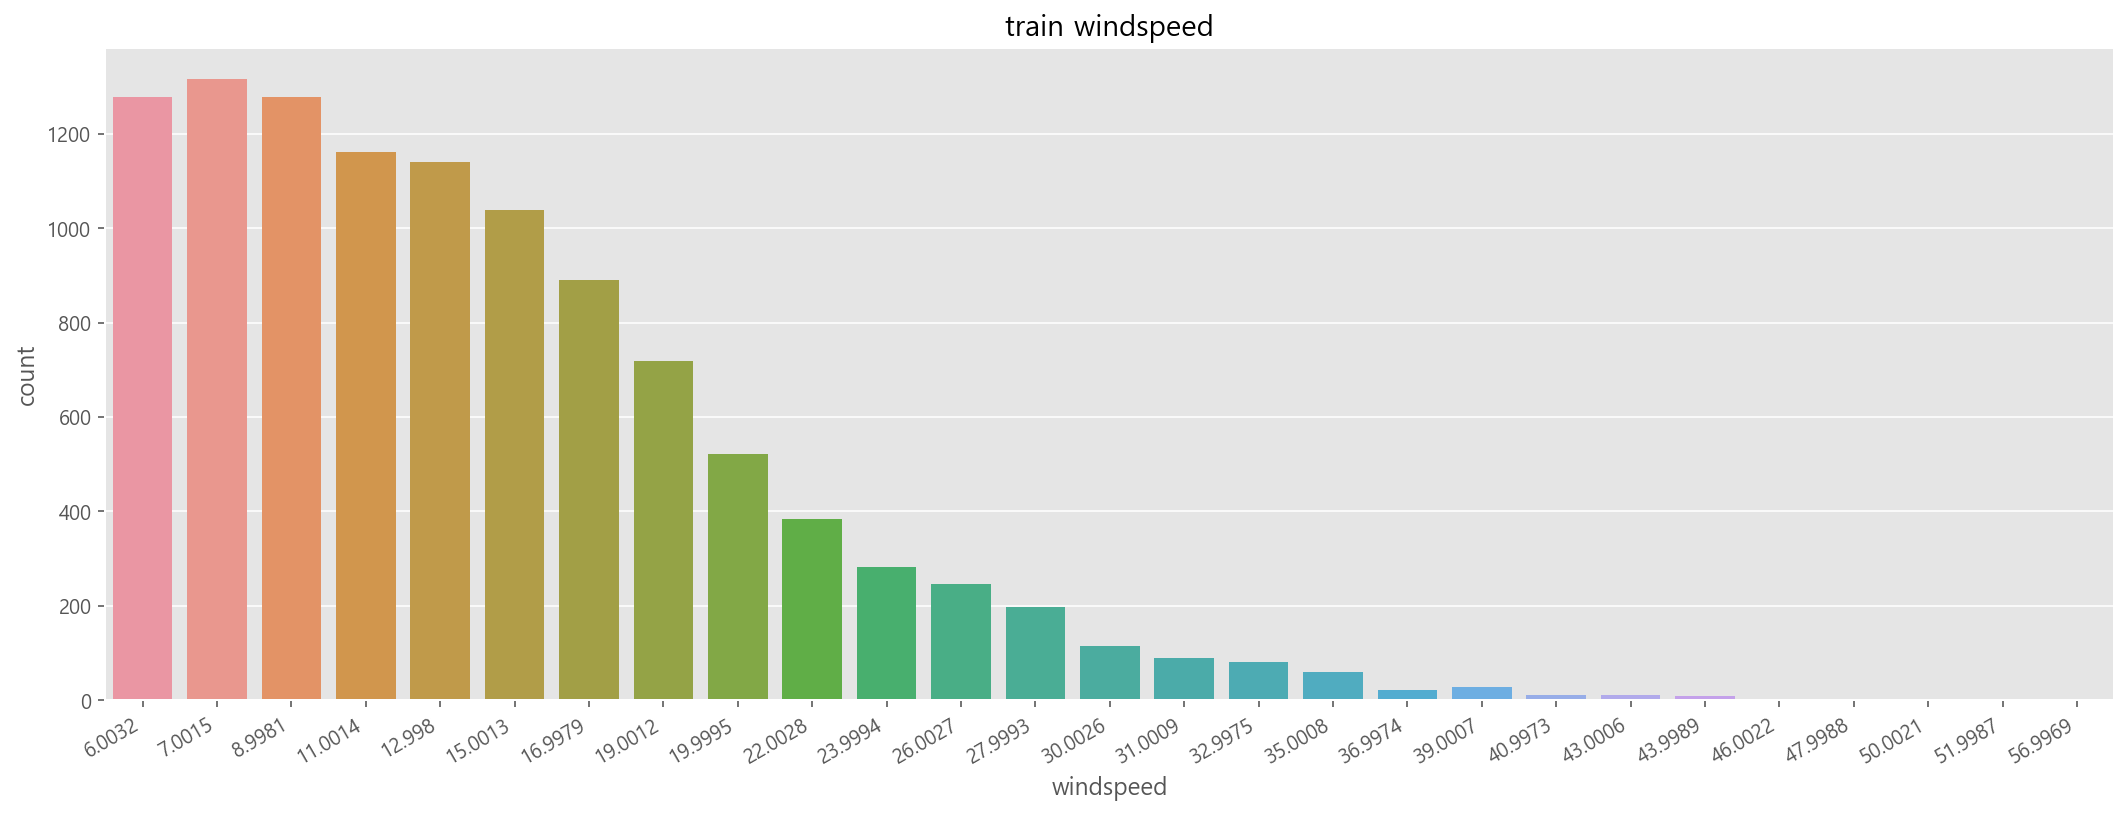

In [36]:
# 0값을 조정한다.
train = predict_windspeed(train)
# test = predict_windspeed(test)

# widspeed 의 0값을 조정한 데이터를 시각화
fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='Count',title="train windspeed")
sns.countplot(data=train, x="windspeed", ax=ax1)

# Feature Selection

* 신호와 소음을 구분해야 한다.
* 피처가 많다고 해서 무조건 좋은 성능을 내지 않는다.
* 피처를 하나씩 추가하고 변경해 가면서 성능이 좋지 않은 피처는 제거하도록 한다.

In [37]:
# 연속형 feature와 범주형 feature 
# 연속형 :: ["temp", "humidity","windspeed", "atemp"]
# 범주형 feature의 타입을 category로 변경해준다 . 
categorical_feature_names = ["season","holiday", "workingday","weather",
                            "dayofweek","month","year","hour"]

for var in categorical_feature_names:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [38]:
# 분석에 사용할 feature들을 선정해줍니다. 

feature_names = ["season","weather","temp","atemp",
                "humidity","windspeed","year",
                "hour", "dayofweek", "holiday", "workingday"]

feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [39]:
# 선택된 feature들만을 포함하는 데이터 프레임을 구성합니다 .
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,2,9.84,12.880,75,6.0032,2011,5,5,0,0
1,1,1,15.58,19.695,76,16.9979,2011,10,5,0,0
2,1,1,14.76,16.665,81,19.0012,2011,11,5,0,0
3,1,1,17.22,21.210,77,19.0012,2011,12,5,0,0
4,1,2,18.86,22.725,72,19.9995,2011,13,5,0,0


In [40]:
# 테스트 데이터에 대해서도 마찬가지로 동일하게 적용합니다. 
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,0,1
1,1,1,10.66,13.635,56,0.0000,2011,1,3,0,1
2,1,1,10.66,13.635,56,0.0000,2011,2,3,0,1
3,1,1,10.66,12.880,56,11.0014,2011,3,3,0,1
4,1,1,10.66,12.880,56,11.0014,2011,4,3,0,1


In [41]:
# 그리고 레이블이 될 데이터를 지정해줍니다. 
# 피설명변수? 
label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

# Score

## RMSLE

과대평가 된 항목보다는 과소평가 된 항목에 패널티를 준다.

오차(Error)를 제곱(Square)해서 평균(Mean)한 값의 제곱근(Root) 으로 값이 작을 수록 정밀도가 높다.

0에 가까운 값이 나올 수록 정밀도가 높은 값이다.

Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE)

 
 
$ \sqrt{ \frac{1}{n} \sum_{i=1}^{n}{ (\log( p_i + 1) - \log(a_i + 1))^2} } $
$ = \sqrt{ \frac{1}{n} \sum_{i=1}^{n}{ (\log \frac {p_i + 1} {a_i + 1} )^2} } $
 

 
n  is the number of hours in the test set

p_i  is your predicted count

a_i  is the actual count

log(x) is the natural logarithm

좀 더 자세한 설명은 : [RMSLE cost function](https://www.slideshare.net/KhorSoonHin/rmsle-cost-function)


잔차(residual)에 대한 평균에 로그를 씌운 값이다. 
=> 과대평가 된 항목보다 과소 평가 된 항목에 패널티를 주기위해 정답에 대한 오류를 숫자로 나타낸 값으로 값이 클 수록 오차가 크다는 의미다.

값이 작을 수록 오류가 적다는 의미를 나타낸다.

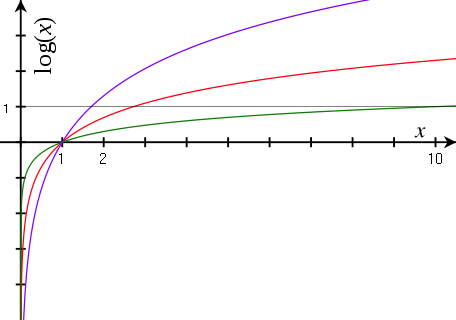

image.png이미지 출처 : 위키피디아 https://ko.wikipedia.org/wiki/로그

이 경진대회의 평가 방식은 RMSLE를 통해 측정합니다. 

In [42]:
# RMLSE를 계산하는 함수를 구성합니다. 
from sklearn.metrics import make_scorer
# RMSE모듈을 담고있는 사이킷런의 메트릭에서 make_scorer를 호출합니다.

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    # 1을 더하는 이유는 0일때 마이너스 무한대가 되기 때문에 1을 더해주고 로그를 씌운다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

## Cross Validation 교차 검증

* 일반화 성능을 측정하기 위해 데이터를 여러 번 반복해서 나누고 여러 모델을 학습한다.
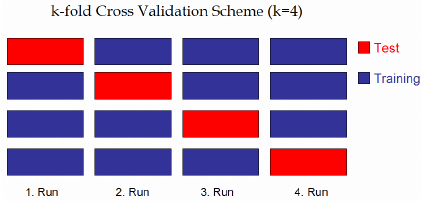

이미지 출처 : https://www.researchgate.net/figure/228403467_fig2_Figure-4-k-fold-cross-validation-scheme-example


* KFold 교차검증
  * 데이터를 폴드라 부르는 비슷한 크기의 부분집합(n_splits)으로 나누고 각각의 폴드 정확도를 측정한다.
  * 첫 번째 폴드를 테스트 세트로 사용하고 나머지 폴드를 훈련세트로 사용하여 학습한다.
  * 나머지 훈련세트로 만들어진 세트의 정확도를 첫 번째 폴드로 평가한다.
  * 다음은 두 번째 폴드가 테스트 세트가 되고 나머지 폴드의 훈련세트를 두 번째 폴드로 정확도를 측정한다.
  * 이 과정을 마지막 폴드까지 반복한다.
  * 이렇게 훈련세트와 테스트세트로 나누는 N개의 분할마다 정확도를 측정하여 평균 값을 낸게 정확도가 된다.

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# RandomForest

In [44]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100, #n_estimator의 숫자를 높일수록 좋은 성능을 보이지만, 시간이 오래 걸림 
                              n_jobs=-1, #
                              random_state=0)
model

RandomForestRegressor(n_jobs=-1, random_state=0)

In [45]:
%time score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

Wall time: 10.6 s
Score= 0.33100


In [58]:
cross_val_score(model, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)

array([0.31652941, 0.33887924, 0.33195034, 0.32116325, 0.32456926,
       0.34161107, 0.33876833, 0.31691428, 0.34932079, 0.33031456])

## Train

In [46]:
# 학습시킴, 피팅(옷을 맞출 때 사용하는 피팅을 생각함) - 피처와 레이블을 넣어주면 알아서 학습을 함
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [47]:
# 예측
predictions = model.predict(X_test)

print(predictions.shape)
predictions[0:10]

(6493,)


array([ 12.8 ,   5.08,   4.32,   3.54,   3.18,   6.23,  38.48, 105.81,
       236.62, 136.7 ])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'test')]

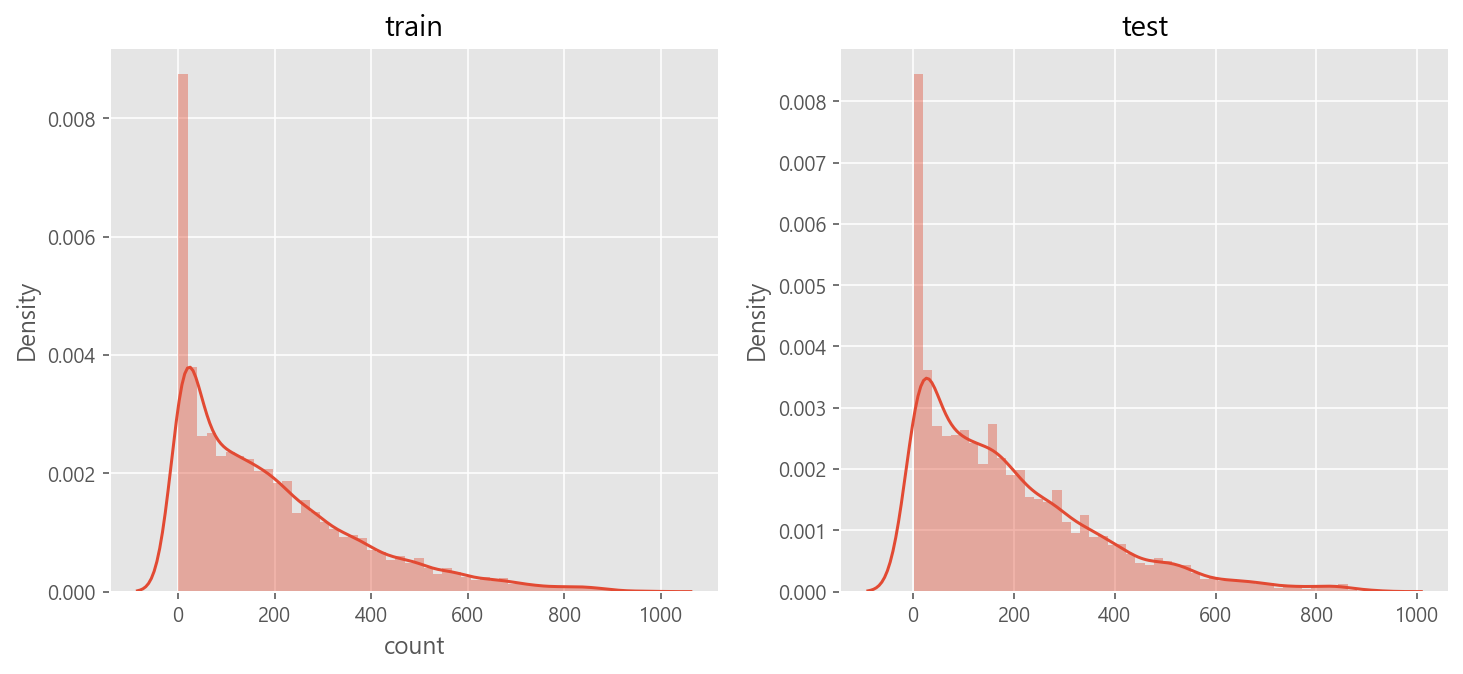

In [48]:
# 예측한 데이터를 시각화 해본다. 
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")

## Submit

In [51]:
submission = pd.read_csv("data_sets/bike_sharing_demand/sampleSubmission.csv")
submission

submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,12.80
1,2011-01-20 01:00:00,5.08
2,2011-01-20 02:00:00,4.32
3,2011-01-20 03:00:00,3.54
4,2011-01-20 04:00:00,3.18


In [52]:
submission.to_csv("data_sets/Score_{0:.5f}_submission.csv".format(score), index=False)

참고 :

*  [EDA & Ensemble Model (Top 10 Percentile) | Kaggle](https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile)
*  [How to finish top 10 percentile in Bike Sharing Demand Competition In Kaggle? (part -1)](https://colab.research.google.com/drive/1aD1AWEshSX3VuCMvH2_emUuv7EKcc9eu#scrollTo=p1NASWPQe7rr&line=3&uniqifier=1)
*  [How to finish top 10 percentile in Bike Sharing Demand Competition In Kaggle? (part -2)](https://medium.com/@viveksrinivasan/how-to-finish-top-10-percentile-in-bike-sharing-demand-competition-in-kaggle-part-2-29e854aaab7d)